In [14]:
from graphviz import Source
from networkx.drawing.nx_agraph import to_agraph
from networkx.readwrite.gpickle import read_gpickle
import networkx as nx

In [15]:
def recursive_newick(tree, node, count):
    successors = list(tree.successors(node))
    if len(successors) == 0:
        cell_id = node
        return f'{cell_id}:{count}'
    elif len(successors) == 1:
        count += 1
        return recursive_newick(tree, successors[0], count)
    else:
        children = []
        for child in successors:
            child_repr = recursive_newick(tree, child, 1)
            children.append(child_repr)
        return '(' + ','.join(children) + f'):{count}'
             

In [16]:
tree_filename = f'../../../mt-SCITE/mt-SCITE_output/Simulations/ground_truth/tree5_map0.gv'

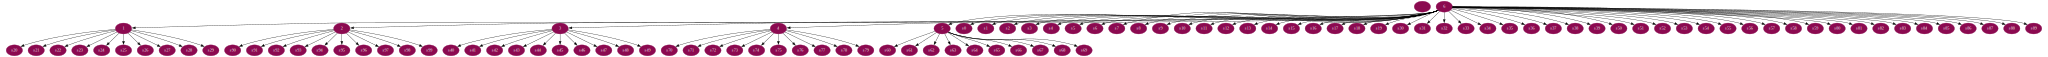

In [17]:
tree = nx.drawing.nx_pydot.read_dot(tree_filename)

from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
g = to_agraph(tree)

g = to_agraph(tree)
display(Source(g))

In [19]:
newick_tree = '(' + recursive_newick(tree, '6', 1) + ');'

In [20]:
newick_filename = '../../../mt-SCITE/mt-SCITE_output/Simulations/ground_truth/tree5_map0_from_gv.newick'
with open(newick_filename, 'w') as f:
    f.write(newick_tree)